# Деревья решений

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/fifa_players.csv")
df.head(5)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [3]:
df= df.drop(columns=['positions'])
df.head(5)
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


In [4]:
df['potential_name'] = pd.cut(df['potential'], bins=[0, 90, 100], labels=['Ниже среднего', 'Выше среднего'])
df

,name,full_name,birth_date,age,height_cm,weight_kgs,nationality,overall_rating,potential,value_euro,...,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,potential_name
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,Argentina,94,94,110500000.0,...,48,22,94,94,75,96,33,28,26,Выше среднего
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,Denmark,88,89,69500000.0,...,46,56,84,91,67,88,59,57,22,Ниже среднего
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,France,88,91,73000000.0,...,78,64,82,88,82,87,63,67,67,Выше среднего
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,Italy,88,88,62000000.0,...,34,26,83,87,61,83,51,24,22,Ниже среднего
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,Senegal,88,91,60000000.0,...,87,88,24,49,33,80,91,88,87,Выше среднего
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,Rory McKenzie,10/7/1993,25,175.26,74.8,Scotland,67,70,975000.0,...,69,41,60,64,63,56,40,20,18,Ниже среднего
17950,M. Sipľak,Michal Sipľak,2/2/1996,23,182.88,79.8,Slovakia,59,67,190000.0,...,62,55,42,39,32,52,53,64,60,Ниже среднего
17951,J. Bekkema,Jan Bekkema,4/9/1996,22,185.42,89.8,Netherlands,59,67,170000.0,...,27,10,5,25,16,47,9,12,13,Ниже среднего
17952,A. Al Yami,Abdulrahman Al Yami,6/19/1997,21,175.26,64.9,Saudi Arabia,59,71,280000.0,...,38,15,54,52,50,53,16,18,17,Ниже среднего


age- Возраст; vision - Видение игры

In [5]:
X=df[['age', 'vision']]
y=df.iloc[:,-1]

In [6]:
X

,age,vision
0,31,94
1,27,91
2,25,88
3,27,87
4,27,49
...,...,...
17949,25,64
17950,23,39
17951,22,25
17952,21,52


In [7]:
y

0        Выше среднего
1        Ниже среднего
2        Выше среднего
3        Ниже среднего
4        Выше среднего
             ...      
17949    Ниже среднего
17950    Ниже среднего
17951    Ниже среднего
17952    Ниже среднего
17953    Ниже среднего
Name: potential_name, Length: 17954, dtype: category
Categories (2, object): ['Ниже среднего' < 'Выше среднего']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую

Обучение классификатора на основе дерева решений и визуализация этого дерева. Визуализация дерева полезна для понимания его структуры и принимаемых решений.

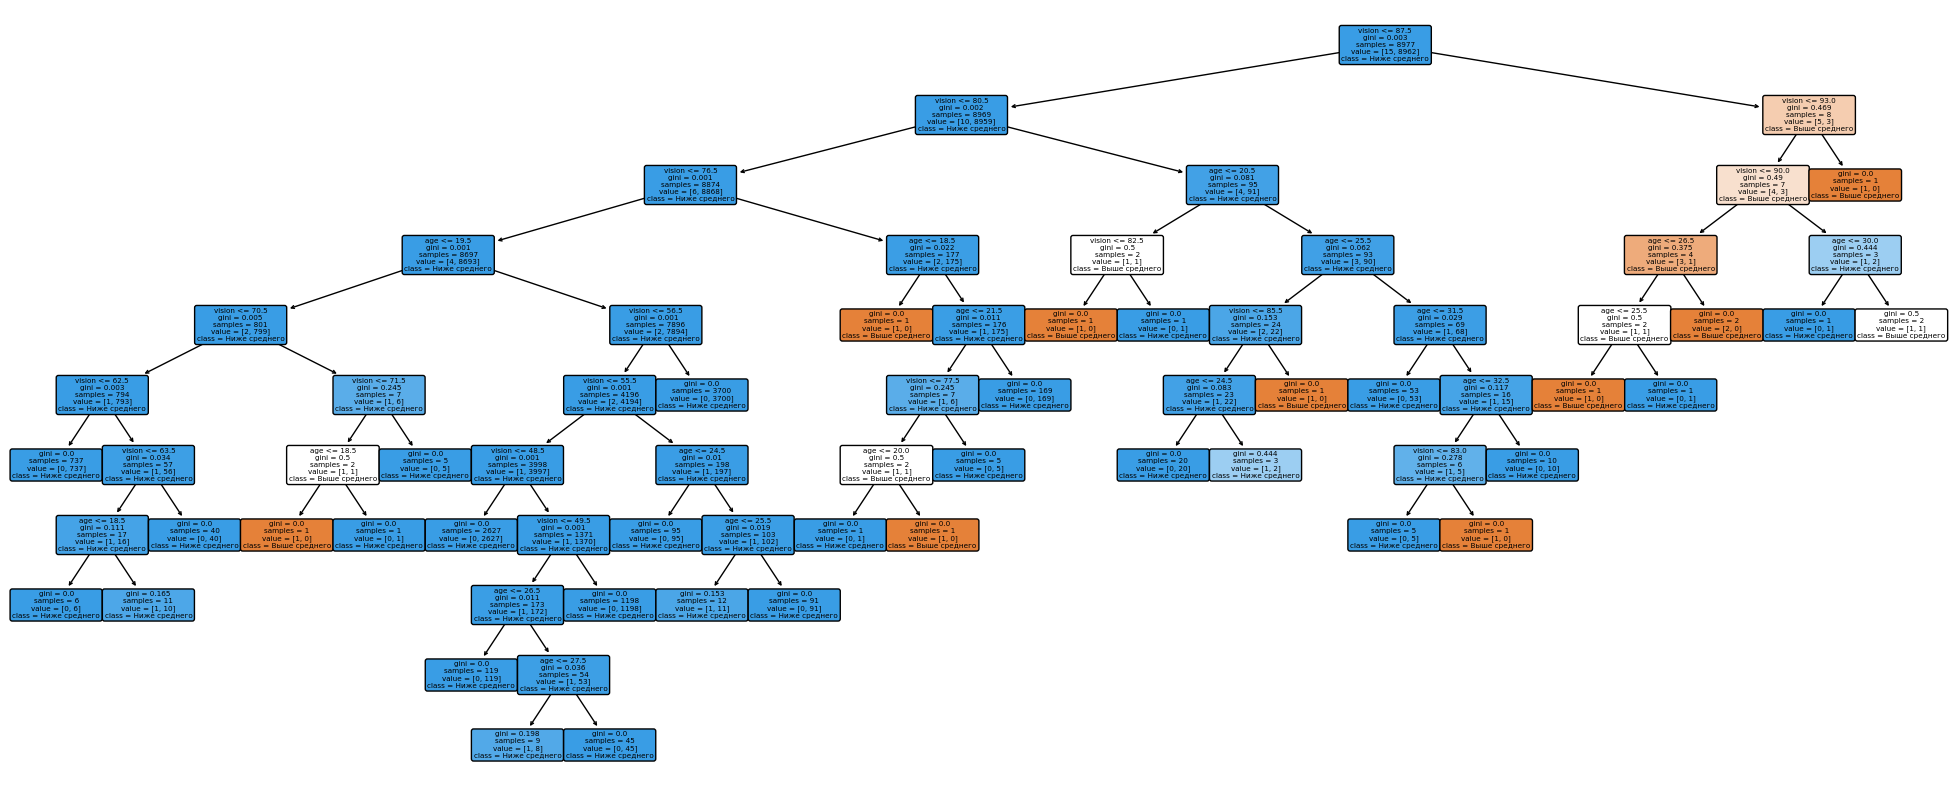

Проверка на новом образце ['Ниже среднего']


C:\Users\Andrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [9]:
clf = DecisionTreeClassifier() # создаем классификатор на основе дерева
clf = clf.fit(X_train, y_train) # обучаем его, т.е. создаем само дерево
y_score=clf.predict(X_test) #предсказание на тестовых данных
plt.figure(figsize=((25,10)))
plot_tree(clf,filled=True, feature_names= X.columns.tolist(),class_names=y.unique(),rounded=True)
plt.show()
# проверка на новых образцах
sample_1=clf.predict([[40,20]])
print(f"Проверка на новом образце {sample_1}")

Конвертируется обученное дерево решений в формат DOT, который используется для представления графов. 

In [10]:
import graphviz # подключаем библиотеку для отображения деревьев
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = export_graphviz(clf, out_file=None) # конвертируем в DOT (в переменную или в файл) 
graph = graphviz.Source(dot_data)  # загружаем дерево из переменной или файла в представление graphviz
graph.render("Potential") # отображаем в файл (по умолчанию pdf)

'Potential.pdf'

Представление графа из данных в формате DOT. Визуализация и представление дерева:

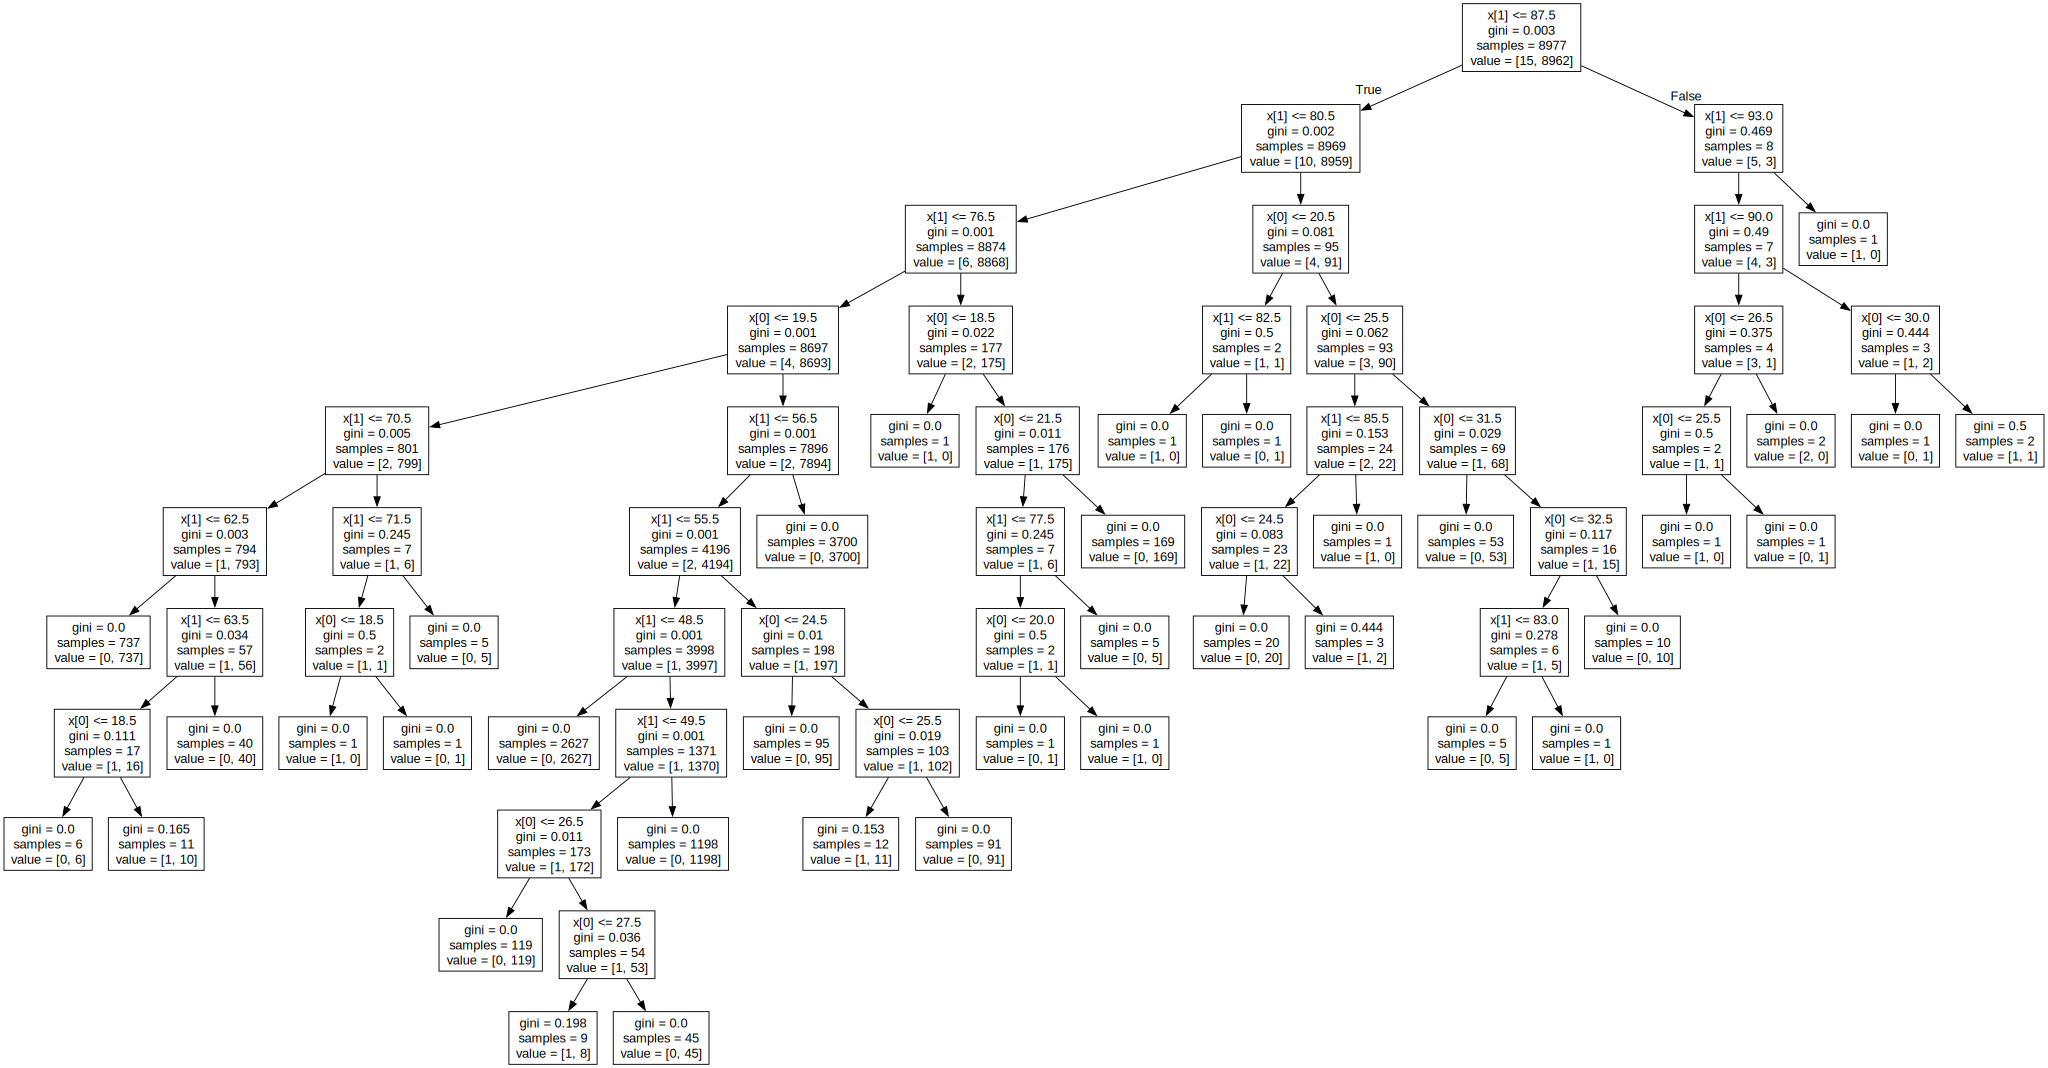

In [11]:
graphviz.Source(dot_data)

Преобразование структуры обученного дерева решений в текстовую строку: 

In [12]:
from sklearn.tree import export_text # подключаем функцию
r = export_text(clf, feature_names=X.columns.tolist()) # переводим дерево в текстовую строку
print(r) # печатаем

|--- vision <= 87.50
|   |--- vision <= 80.50
|   |   |--- vision <= 76.50
|   |   |   |--- age <= 19.50
|   |   |   |   |--- vision <= 70.50
|   |   |   |   |   |--- vision <= 62.50
|   |   |   |   |   |   |--- class: Ниже среднего
|   |   |   |   |   |--- vision >  62.50
|   |   |   |   |   |   |--- vision <= 63.50
|   |   |   |   |   |   |   |--- age <= 18.50
|   |   |   |   |   |   |   |   |--- class: Ниже среднего
|   |   |   |   |   |   |   |--- age >  18.50
|   |   |   |   |   |   |   |   |--- class: Ниже среднего
|   |   |   |   |   |   |--- vision >  63.50
|   |   |   |   |   |   |   |--- class: Ниже среднего
|   |   |   |   |--- vision >  70.50
|   |   |   |   |   |--- vision <= 71.50
|   |   |   |   |   |   |--- age <= 18.50
|   |   |   |   |   |   |   |--- class: Выше среднего
|   |   |   |   |   |   |--- age >  18.50
|   |   |   |   |   |   |   |--- class: Ниже среднего
|   |   |   |   |   |--- vision >  71.50
|   |   |   |   |   |   |--- class: Ниже среднего
|   |   |   |

Создание, обучение и оценки модели случайного леса: 

In [13]:
from sklearn.datasets import make_classification # для генерации данных
from sklearn.model_selection import train_test_split # для разделения на обучение и тест
from sklearn.ensemble import RandomForestClassifier # случайный лес
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import numpy as np
import seaborn as sns # для простого отображения
import matplotlib.pyplot as plt #

# Создаем классификатор на основе случайного леса. Изменяйте параметры и смотрите как это влияет на обучение
clf = RandomForestClassifier(max_depth=5,# максимальная глубина дерева
                             n_estimators=10,# число деревьев в лесу
                             max_features=1)# максимальное число признаков для каждого дерева

clf.fit(X_train, y_train) # обучаем 

y_pred = clf.predict(X_test) # проверяем на тестовых данных

score=clf.score(X_test, y_test) # считаем среднюю точность
print(f"Средняя точность: {score}")

# оценка точности модели
print(metrics.classification_report(y_test, y_pred))


Средняя точность: 0.9983290631614125
               precision    recall  f1-score   support

Выше среднего       0.20      0.08      0.12        12
Ниже среднего       1.00      1.00      1.00      8965

     accuracy                           1.00      8977
    macro avg       0.60      0.54      0.56      8977
 weighted avg       1.00      1.00      1.00      8977



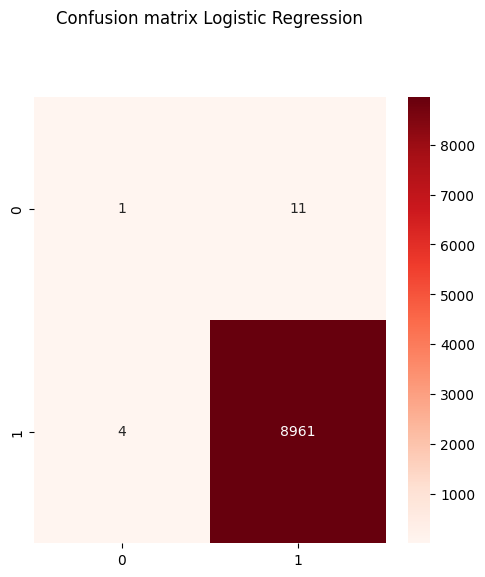

In [14]:
# матрица неточности

fig = plt.figure(figsize = (5,5))
ax = fig.gca()

cnf_matrix_log = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)
plt.show()

Модель достигает общей точности около 99.8%, что свидетельствует о неплохой способности предсказывать категории.

Но класс 'Выше среднего' имеет низкий показатели точности(10%) и полноты(8%), что говорит о плохой способности модели правильно идентифицировать этот класс.
Класс 'Ниже среднего' показывает отличные результаты в точности(100%).


Матрица неточности: показывает , что модель хорошо справляется с классификацией образцов.

## Визуализация леса

Визуализация структуры третьего дерева решений случайного леса:

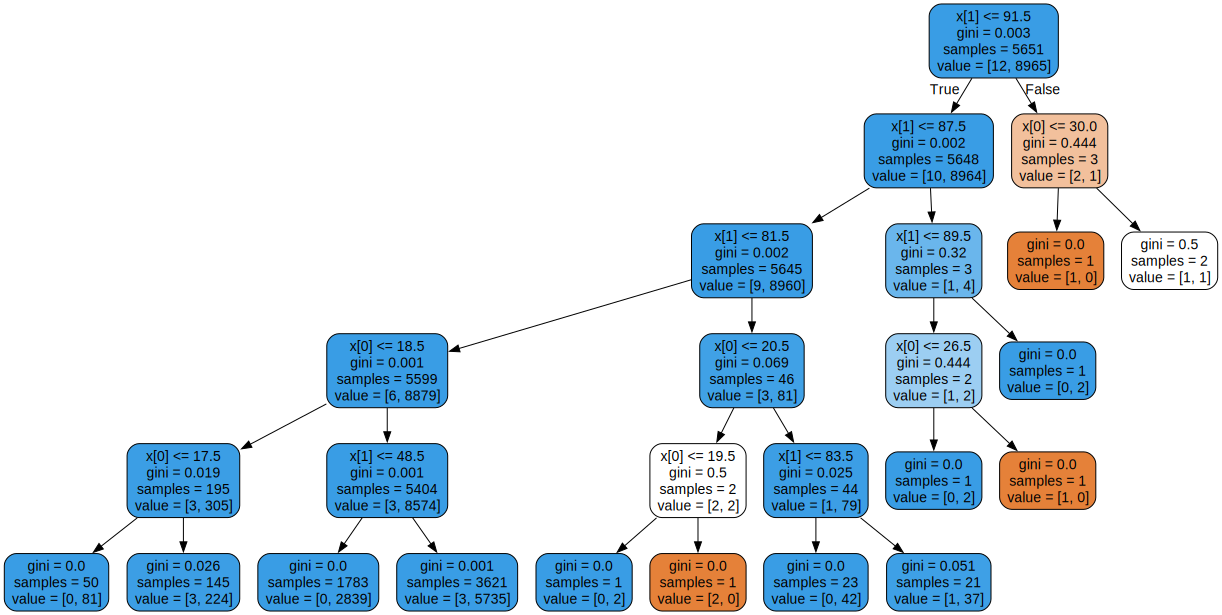

In [15]:
tree_data=clf.estimators_[2] # третье дерево

# рисуем его
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(tree_data, out_file=None,  # можем указать дополнительные опции конвертации
                     filled=True, rounded=True)  # прочие детали отображения
graph = graphviz.Source(dot_data)  # # загружаем дерево из переменной или файла в представление graphviz
graph  # отображаем на экране

In [16]:

df['potential_name2'] = df['potential_name'].replace({'Выше среднего': 0, 'Ниже среднего': 1})
X=df[['age', 'vision']]
y=df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую
clf = DecisionTreeClassifier() # создаем классификатор на основе дерева
clf = clf.fit(X_train, y_train) # обучаем его, т.е. создаем само дерево
y_score=clf.predict(X_test) #предсказание на тестовых данных

# проверка на новых образцах
sample_1=clf.predict([[40,20]])



C:\Users\Andrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


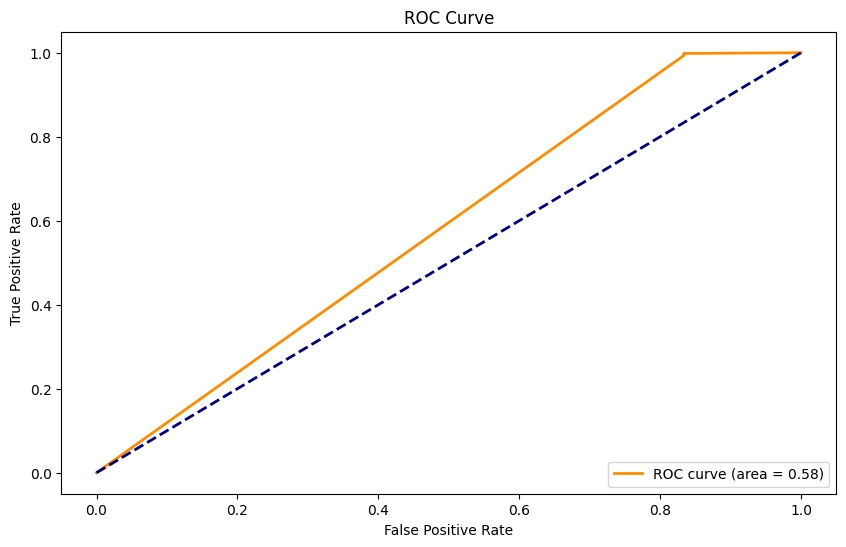

0.5802565532626882

In [17]:
# ROC-анализ
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Получение вероятностей для класса 'Дорогой' (класс 1)
y_scores = clf.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой и площади под ней (AUC)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Визуализация ROC-кривой
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
roc_auc

Площадь под кривой (roc_auc) указывет на не самое лучшее качество модели в разделении классов. Чем ближе значение к 1, тем лучше модель различает между классами.